# **World Development Indicators**

This project will analyse the world development indicators data of economic development from hundreds of countries around the world from 1960 to 2015. It will look specifically at the trend of economic development correlated to its geographical region, CO2 emissions and life expectancy, and also investigate if there is relationship between population and GDP growth percentage. 

Summary of contents:

1. Introduction 
2. Summary
3. Data Inspection and Cleaning 
4. Analysis and Answers to Questions 
5. Recommendation and Conclusion
6. References


### **1. Introduction**

The World Development Indicators (WDI) from the World Bank is the primary World Bank collection of development indicators, compiled from officially recognized international sources. It presents the most current and accurate global development data available, and includes national, regional, and global estimates. The database contains 1,400 time series indicators for 217 economies and more than 40 country groups, with data for many indicators going back more than 50 years.

The analysis completed as part of this project will help visualise the correlation between economic development, its environmental impact and potential life quality implications with their life expectancy.

While I think it would also be interesting to see how world and regional events impact the economic growth of the region or vice versa, the data set still provides opportunity to interpret the data in different settings.  

**The following questions will be answered:** 



* In 1980, which country had the longest life expectancy? How many years is it?

* In 1980, what was the household final consumption expenditure, etc. (current US$) in Australia, and how does it compare to the rest of the world?

* In 1974, which countries are the top 10 economical performer based on annual GDP growth percentage?

* On a global scale, is there a relationship between CO2 emission and GDP growth percentage as time went on?

* Which country produced the most total CO2 emission in 1961, and is this related to their population?

* Is there a relationship between the household final consumption expenditure, etc. (current US$), population life expectancy and annual GDP growth percentage in Mainland China?



**Data Files**

This project uses the below data files. The key that links the files is CountryCode. The files will be inspected in detail in section 3 below, with a brief summary provided here. 

**Life expectancy at birth, total (years).csv**

**Household final consumption expenditure (current US$).csv**

**GDP growth (annual %).csv**

**CO2 emissions (metric tons per capita).csv**

**Population, total.csv**

File obtained from [Kaggle](https://www.kaggle.com/datasets/kaggle/world-development-indicators?select=CountryNotes.csv) (Kaggle, 2020), the dataset hosted on Kaggle is a slightly transformed from the source data from the World Bank to facilitate analytics. 

The columns in the above files we will use include:

* CountryName
* CountryCode
* IndicatorName
* Year 
* Value

A range of different world development indicators are presented in the same column, we are only interested in some of them and the values are also in different units. 

This is also an extremely large file therefore, I had to deduct some of the Indicators I am not interested in before uploading to Jupyter notes on Ed. The data used in this project are above outlined world develipment indicators from the year 1960-1980. 

**world_pop.csv**

File obtained from [Kaggle](https://www.kaggle.com/chadalee/country-wise-population-data) (Chadha, 2018). Main data columns include: 

* Country
* Country Code
* Years (as columns) (1960-2016) with values of total population. 

### **2. Summary**
Overall, the correlation between economic growth,  living standard and CO2 emission is a complex one, with a number of furture analysis identified. While the analysation of the data is outlined and discussed in detail in the Analysis and Answers section, it is found that the socioeconomic improvement and life expectancy at birth with household spending and CO2 emission per capita and infant mortality rate as history variables for the socioeconomic improvement. the yearly progression demonstrates that the effect of a change in household spending per capita has a substantial impact on the life expectancy of the population at birth. It suggests that the life expectancy at birth is impacted by the GDP growth percentage and socioeconomic improvement withinside the country.

### **3. Data Inspection & Cleaning**

In [1]:
# Start by importing required modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import log
from numpy import where
import geopandas
import geoplot

%matplotlib inline

/usr/lib/python3.10/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [2]:
# Import the required data

country_df = pd.read_csv("Country.csv", index_col=0)
co2_df = pd.read_csv("CO2 emissions (metric tons per capita).csv", index_col=0)
lifexpec_df = pd.read_csv("Life expectancy at birth, total (years).csv", index_col=0)
household_df = pd.read_csv("Household final consumption expenditure (current US$).csv", index_col=0)
GDP_df = pd.read_csv("GDP growth (annual %).csv", index_col=0)
population_df = pd.read_csv("Population, total.csv", index_col=0)


# inspect a few of the dataframes randomly, since they have the same structure 
# check wether whether the columns are unique
print(co2_df.columns.is_unique)
# check the number of rows and columns
print(co2_df.shape)
print(lifexpec_df.shape)
print(household_df.shape)
print(GDP_df.shape)
print(population_df.shape)
# check on the columns with the same values
print(co2_df[co2_df.duplicated() == True])
# check the first 5 rows in the data frame
co2_df.head()
household_df.head()


True
(3838, 4)
(4568, 4)
(2167, 4)
(2626, 4)
(4992, 4)
Empty DataFrame
Columns: [CountryCode, IndicatorName, Year, Value]
Index: []


,CountryCode,IndicatorName,Year,Value
CountryName,,,,
East Asia & Pacific (developing only),EAP,Household final consumption expenditure (curre...,1960,4.432743e+10
Heavily indebted poor countries (HIPC),HPC,Household final consumption expenditure (curre...,1960,1.374454e+10
Latin America & Caribbean (all income levels),LCN,Household final consumption expenditure (curre...,1960,5.886999e+10
Latin America & Caribbean (developing only),LAC,Household final consumption expenditure (curre...,1960,3.039641e+10
Low & middle income,LMY,Household final consumption expenditure (curre...,1960,1.690000e+11



Upon random inspection the data in the datasets seems logical. the columns are unique, there no duplicated rows. 

However, after checking the size of the other data files, it looks like we will have to do some further cleaning when we want to use different datasets together. This is mainly due to the inconsistency in the No. of countries that is present in each dataset. 

**world_pop.csv** will later be imported individually when it is used to create heat map graph. 

For 

**Life expectancy at birth, total (years).csv**

**Household final consumption expenditure (current US$).csv**

**GDP growth (annual %).csv**

**CO2 emissions (metric tons per capita).csv**

**Population, total.csv**

1. Sort the CountryCode in each of the data set by alphabetical order, and then sort by years the data collected. 
2. The there is a difference between the column naming of the 5 data sets above and **world_pop.csv**, name the column name in these 5 dataset from 'CountryCode' to 'Country Code' to maintain consistency.  
3. rename the **Value** column by the name of their data set, this will name things easier when we combine the datasets later. 
4. when datasets need to be used together to answer questions, they will need to be combined, and any rows with null value in **CountryCode** and **Years** will be dropped. However, this will be performed in the analysis process. 


In [3]:
# sort the countrycode by alphabetical order, Year by dscending order 
co2_df = co2_df.sort_values(by = ['CountryCode', 'Year'],ascending = [True, False],)
lifexpec_df = lifexpec_df.sort_values(by = ['CountryCode', 'Year'],ascending = [True, False],)
household_df = household_df.sort_values(by = ['CountryCode', 'Year'],ascending = [True, False],)
GDP_df = GDP_df.sort_values(by = ['CountryCode', 'Year'],ascending = [True, False],)
population_df = population_df.sort_values(by = ['CountryCode', 'Year'],ascending = [True, False],)

#rename the column CountryCode column
co2_df = co2_df.rename(columns = {'CountryCode' : 'Country Code'})
lifexpec_df = lifexpec_df.rename(columns = {'CountryCode' : 'Country Code'})
household_df = household_df.rename(columns = {'CountryCode' : 'Country Code'})
GDP_df = GDP_df.rename(columns = {'CountryCode' : 'Country Code'})
population_df = population_df.rename(columns = {'CountryCode' : 'Country Code'})

# rename the value column by the name of their data set.
co2_df = co2_df.rename(columns = {'Value' : 'CO2 emissions (metric tons per capita)'})
lifexpec_df = lifexpec_df.rename(columns = {'Value' : 'Life expectancy at birth, total (years)'})
household_df = household_df.rename(columns = {'Value' : 'Household final consumption expenditure (current US$)'})
GDP_df = GDP_df.rename(columns = {'Value' : 'GDP growth (annual %)'})
population_df = population_df.rename(columns = {'Value' : 'Population, total'})
#inspect CO2 emission data as a example 
print(co2_df)

            Country Code                           IndicatorName  Year  \
CountryName                                                              
Afghanistan          AFG  CO2 emissions (metric tons per capita)  1980   
Afghanistan          AFG  CO2 emissions (metric tons per capita)  1979   
Afghanistan          AFG  CO2 emissions (metric tons per capita)  1978   
Afghanistan          AFG  CO2 emissions (metric tons per capita)  1977   
Afghanistan          AFG  CO2 emissions (metric tons per capita)  1976   
...                  ...                                     ...   ...   
Zimbabwe             ZWE  CO2 emissions (metric tons per capita)  1968   
Zimbabwe             ZWE  CO2 emissions (metric tons per capita)  1967   
Zimbabwe             ZWE  CO2 emissions (metric tons per capita)  1966   
Zimbabwe             ZWE  CO2 emissions (metric tons per capita)  1965   
Zimbabwe             ZWE  CO2 emissions (metric tons per capita)  1964   

             CO2 emissions (metric to

At this point, the datasets looks clear and consistent enough for analysis, further manipulation will be performed specific to questions below.  

### **4. Analysis and Answers to Questions**
**Question 1: In 1980, which country had the longest life expectancy? How many years is it?**

In [4]:
# create dataframe with all life expectancy data from 1980
q1 = lifexpec_df[lifexpec_df['Year'] == 1980]

# obtain the longest life expectancy (years) in 1980 
q1_years = q1['Life expectancy at birth, total (years)'].max()

# filtering data by nominating the value we got from the previouse step 
q1_country = q1[q1['Life expectancy at birth, total (years)'] == q1_years]

print(q1_country)

            Country Code                            IndicatorName  Year  \
CountryName                                                               
Canada               CAN  Life expectancy at birth, total (years)  1980   

             Life expectancy at birth, total (years)  
CountryName                                           
Canada                                     75.078049  


**Answer:**

In 1980, Canada had the longest life expectancy at birth of 75.078049 years. 

**Question 2: In 1980, what was the household final consumption expenditure, etc. (current US$) in Australia, and how does it compare to the rest of the world?**

Country Code                                                                                           AUS
IndicatorName                                            Household final consumption expenditure (curre...
Year                                                                                                  1980
Household final consumption expenditure (current US$)                                        83155431755.0
Name: Australia, dtype: object


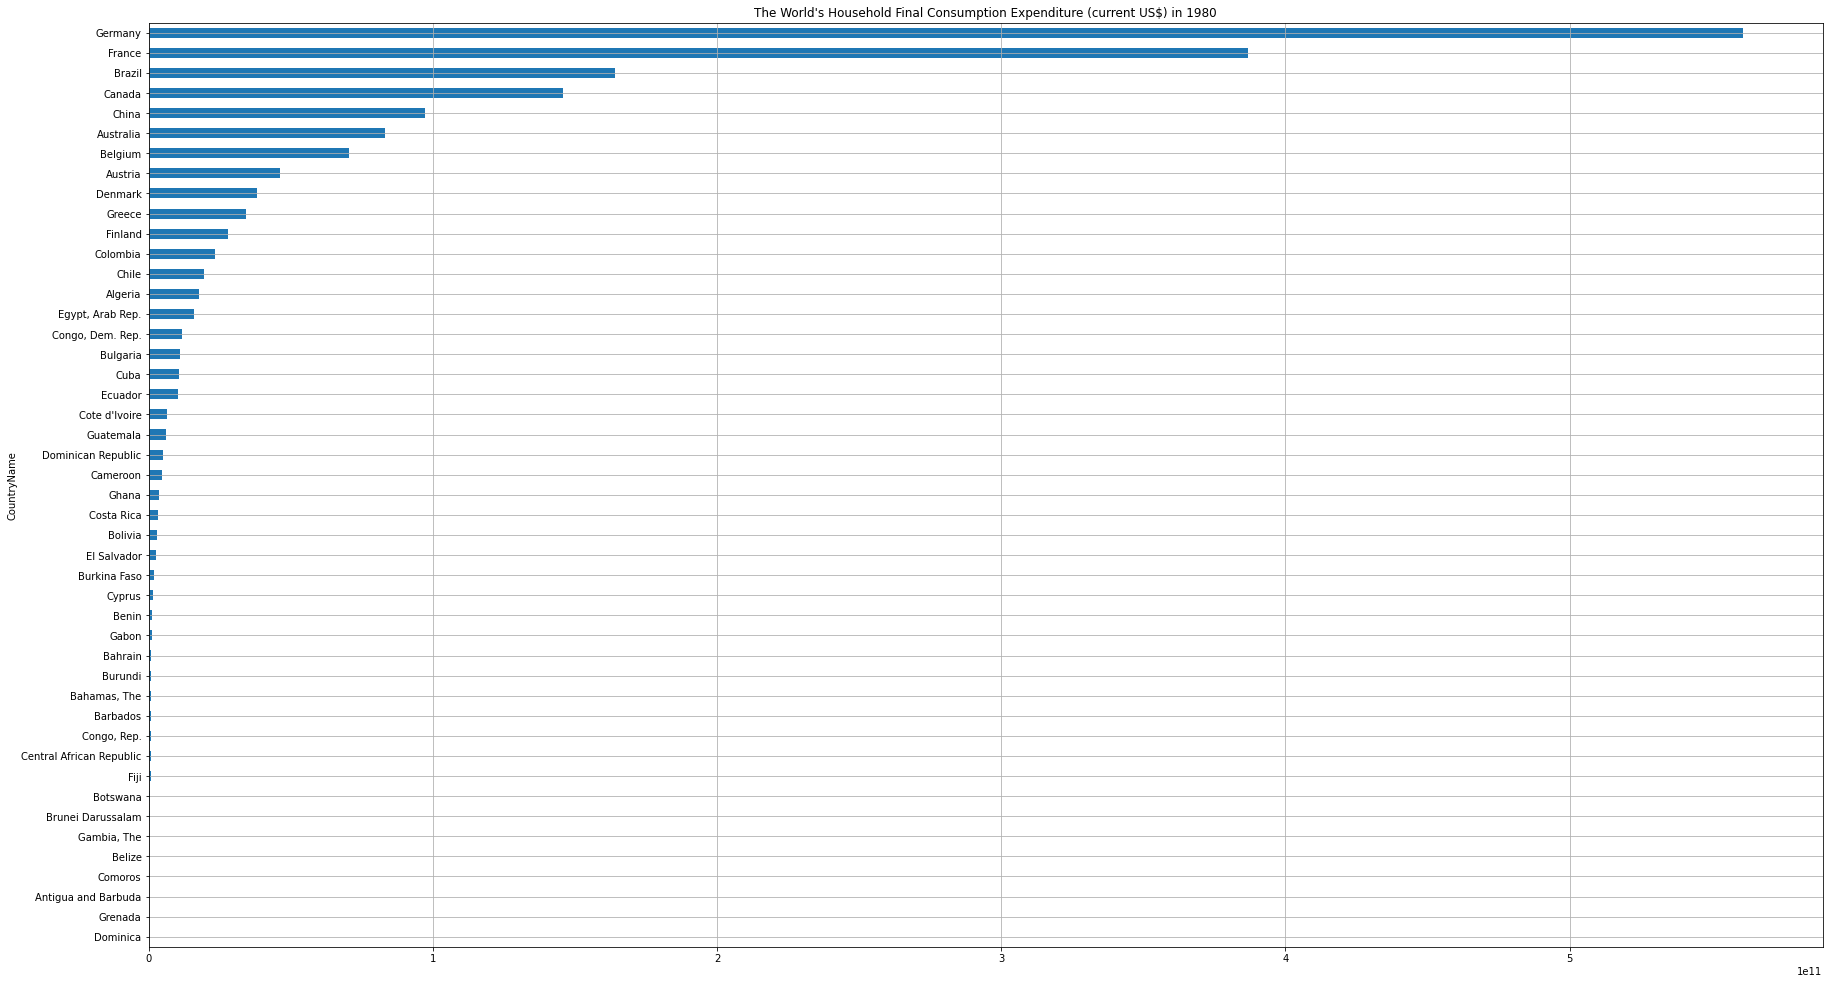

In [5]:
# create dataframe with all household final consumption expenditure data from 1980
q2 = household_df[household_df['Year'] == 1980]

# obtain the household final consumption expenditure in 1980 Australia
q2_aus = q2.loc['Australia']
print(q2_aus)

#drop the regional data, we are only interested in countries 
q2 = q2.drop(['Arab World','Caribbean small states',
'East Asia & Pacific (all income levels)',
'East Asia & Pacific (developing only)',
'Euro area',
'Europe & Central Asia (all income levels)',
'European Union',
'Heavily indebted poor countries (HIPC)',
'High income',
'High income: OECD',
'Latin America & Caribbean (all income levels)',
'Latin America & Caribbean (developing only)',
'Low & middle income',
'Lower middle income',
'Middle East & North Africa (all income levels)',
'Middle East & North Africa (developing only)',
'Middle income',
'North America',
'OECD members',
'Other small states',
'Pacific island small states',
'Small states',
'South Asia',
'Sub-Saharan Africa (all income levels)',
'Sub-Saharan Africa (developing only)',
'Upper middle income',
'World'])

# compare the Australia household final consumption expenditure value with other countries documented using bar chart

# Sort the results and show them on a bar graph
q2 = q2.sort_values(
    by = 'Household final consumption expenditure (current US$)',
    ascending = True,
)

#create horizontal bar chart
q2['Household final consumption expenditure (current US$)'].plot(
    kind='barh',
    grid = True,
    figsize = (30,17),
    title='The World\'s Household Final Consumption Expenditure (current US$) in 1980',
    ylabel = 'current US$'
)

#save bar chart as plot 2
plt.savefig('q2_graph.png')


**Answer:**

In 1980, the household final consumption expenditure, etc. in Australia is **83155431755.0** (current US$). 

Comparing to the rest of the world in 1980, Australia is one of the largest economies. Although there is a huge difference between the top 2 highest household final consumption expenditure countries (Germany and France) and the rest of the world. 

**Question 3: In 1974, which countries are the top 10 economical performer based on annual GDP growth percentage?**

,Country Code,IndicatorName,Year,GDP growth (annual %)
CountryName,,,,
Mauritania,MRT,GDP growth (annual %),1974,12.162611
New Caledonia,NCL,GDP growth (annual %),1974,12.701115
Belize,BLZ,GDP growth (annual %),1974,13.559985
Nicaragua,NIC,GDP growth (annual %),1974,14.192425
Iraq,IRQ,GDP growth (annual %),1974,16.113367
French Polynesia,PYF,GDP growth (annual %),1974,18.001049
Saudi Arabia,SAU,GDP growth (annual %),1974,22.597362
Syrian Arab Republic,SYR,GDP growth (annual %),1974,24.127230
Gabon,GAB,GDP growth (annual %),1974,39.487095


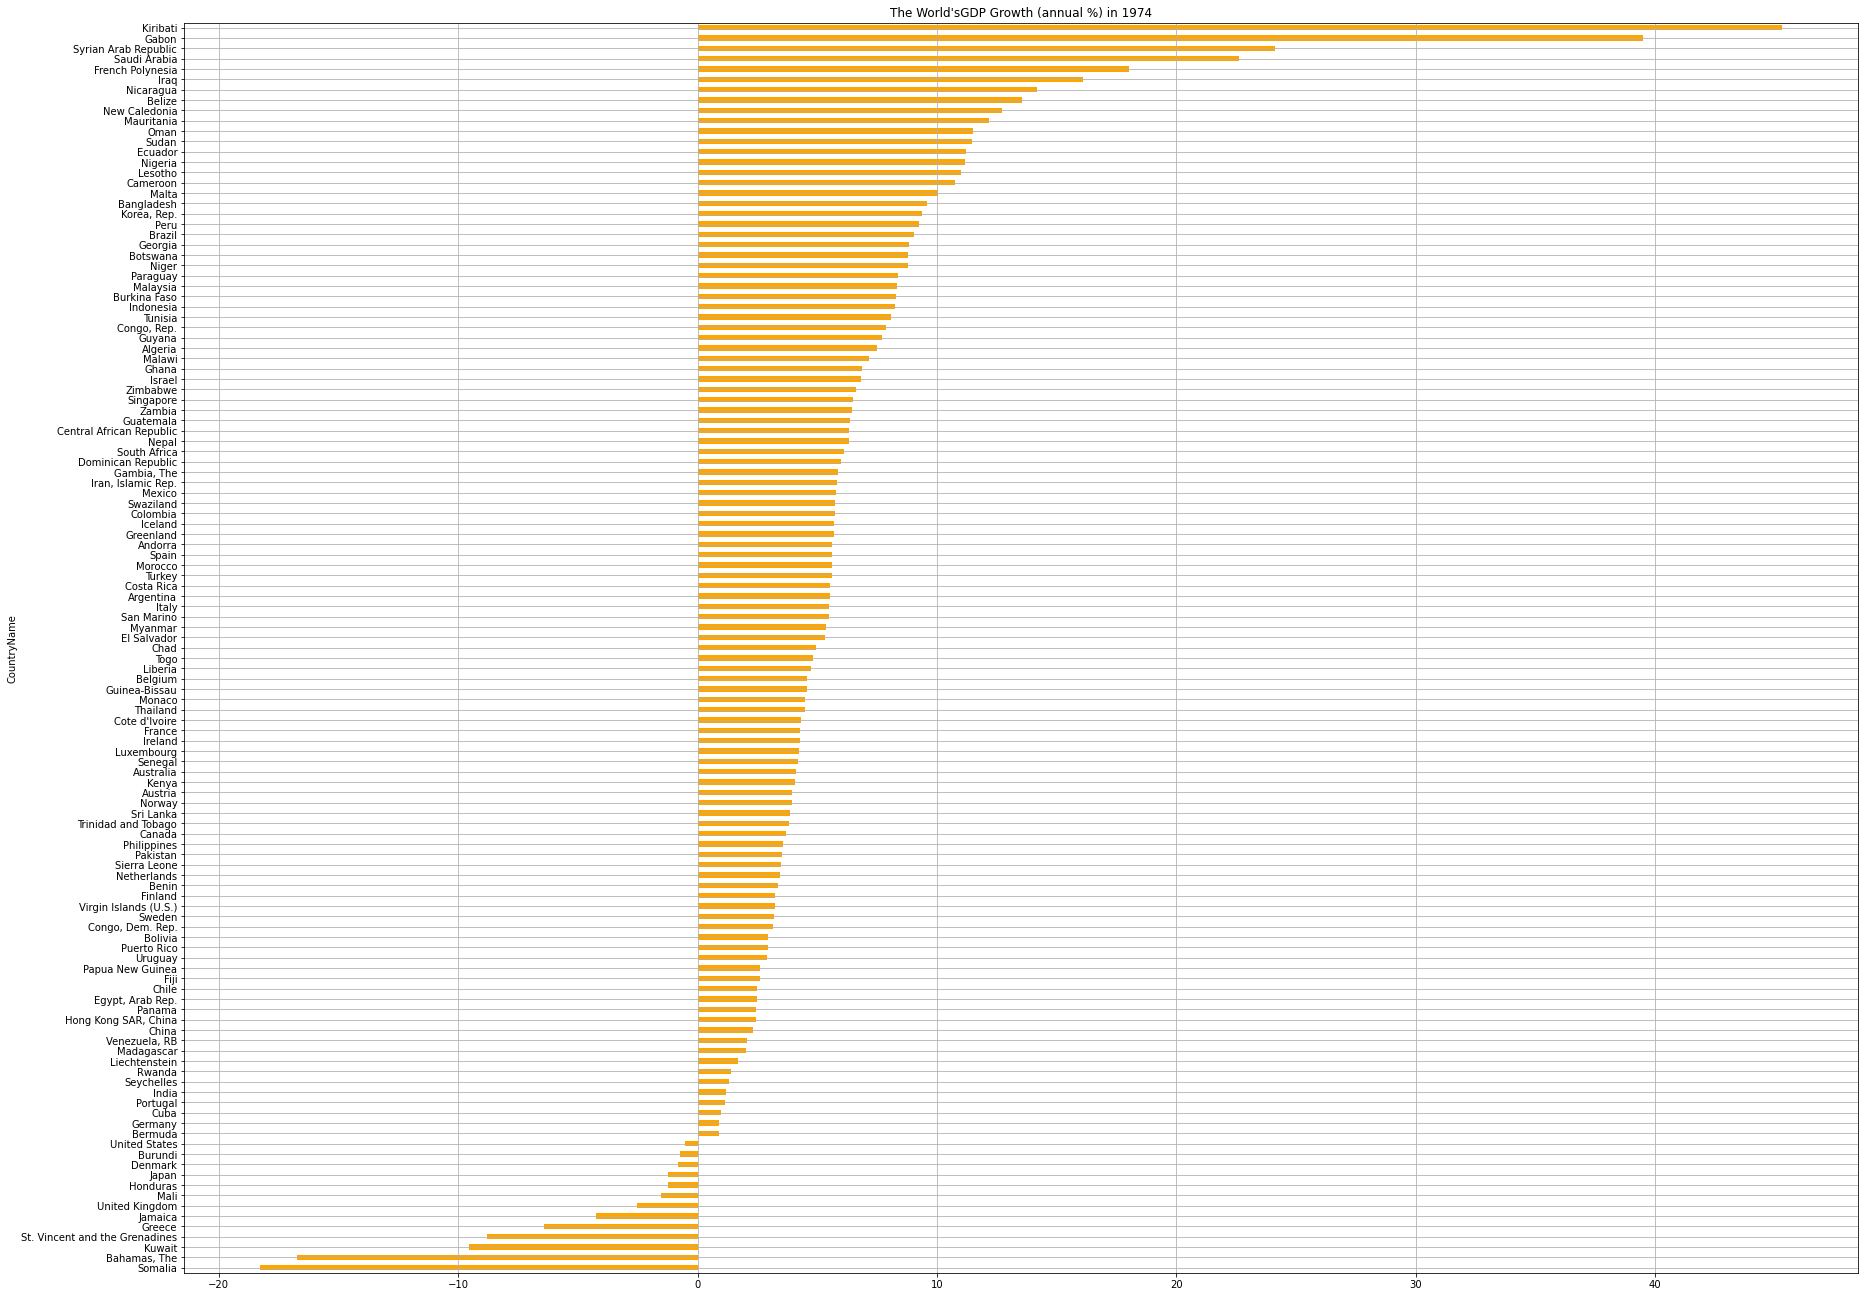

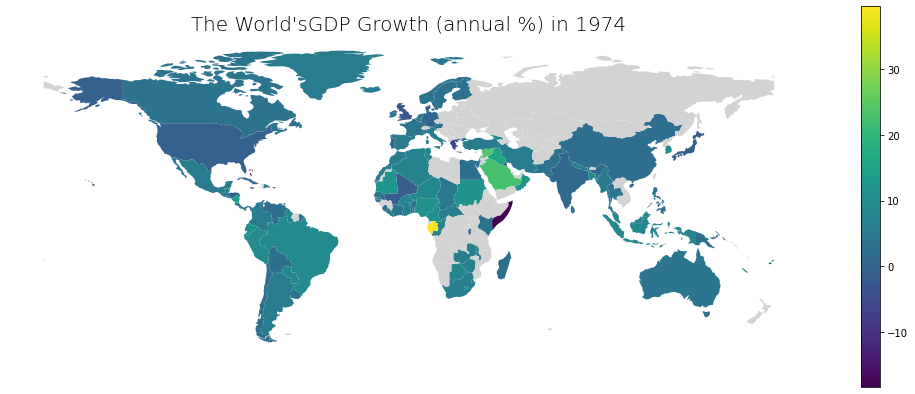

In [6]:
# create dataframe with all GDP growth data from 1974
q3 = GDP_df[GDP_df['Year'] == 1974]

#drop the regional data, we are only interested in countries 
q3 = q3.drop([
'Caribbean small states',
'East Asia & Pacific (all income levels)',
'East Asia & Pacific (developing only)',
'Euro area',
'European Union',
'Europe & Central Asia (all income levels)',
'Heavily indebted poor countries (HIPC)',
'High income',
'High income: OECD',
'Latin America & Caribbean (all income levels)',
'Latin America & Caribbean (developing only)',
'Low & middle income',
'Lower middle income',
'Middle East & North Africa (all income levels)',
'Middle East & North Africa (developing only)',
'Middle income',
'North America',
'OECD members',
'South Asia',
'Sub-Saharan Africa (all income levels)',
'Sub-Saharan Africa (developing only)',
'Upper middle income',
'World',
])

# Sort the results and show them on a bar graph
q3_graph = q3.sort_values(by = 'GDP growth (annual %)', ascending = True,)

#setting up new figure 
plt.figure()

#create horizontal bar chart
q3_graph['GDP growth (annual %)'].plot(
    kind='barh',
    figsize=[30, 23],
    title='The World\'sGDP Growth (annual %) in 1974',
    color='orange', 
    grid=True,
)

#save bar chart as plot 3
plt.savefig('q3_graph.png')

# Load the world map data file
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world = world[(world.name!="Antarctica")]
world.rename({'iso_a3': 'Country Code'}, axis=1, inplace=True)

# Fix some incorrect country codes that were discovered from missing data
world['Country Code'] = where(world['name']=='France', 'FRA', world['Country Code'])
world['Country Code'] = where(world['name']=='Norway', 'NOR', world['Country Code'])

# Merge with our data 
world = world.merge(q3, on=['Country Code'], how='left')

# Create the heatmap
fig, ax_world = plt.subplots(1, figsize=(18, 7))
ax_world.set_title(
    'The World\'sGDP Growth (annual %) in 1974', 
    fontdict={'fontsize': '20', 'fontweight': '50'}
)
ax_world.axis('off')
world.plot(
    column='GDP growth (annual %)', 
    legend=True,
    ax=ax_world,
    cmap='viridis',
    missing_kwds={"color": "lightgrey"}
)

#print the top 10 countries into a table 
q3_graph.tail(10)

**Answer:**

In 1974, which countries are the top 10 economical performer based on annual GDP growth percentage are :

* Kiribati

* Gabon

* Syrian Arab Republic

* Saudi Arabia

* French Polynesia

* Iraq

* Nicaragua

* Belize

* New Caledonia

* Mauritania

Based on the map analysis, in 1974, small island countries and the African-Middle Eastern region shows a strong economic growth. The rest of the world shows a slow growth. While Somalia is doing particularly bad due to the age long poverty and the Ethiopian–Somali conflict (Keesing's Worldwide, 2016). 

**Question 4: On a global scale, is there a relationship between CO2 emission and GDP growth percentage as time went on?**

                                            Year  \
Year                                    1.000000   
CO2 emissions (metric tons per capita)  0.968230   
GDP growth (annual %)                  -0.526512   

                                        CO2 emissions (metric tons per capita)  \
Year                                                                  0.968230   
CO2 emissions (metric tons per capita)                                1.000000   
GDP growth (annual %)                                                -0.431307   

                                        GDP growth (annual %)  
Year                                                -0.526512  
CO2 emissions (metric tons per capita)              -0.431307  
GDP growth (annual %)                                1.000000  


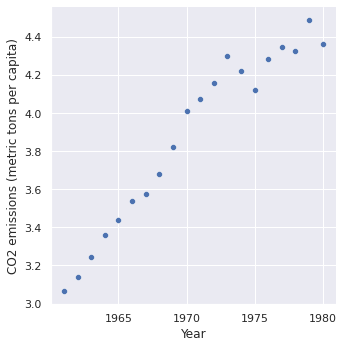

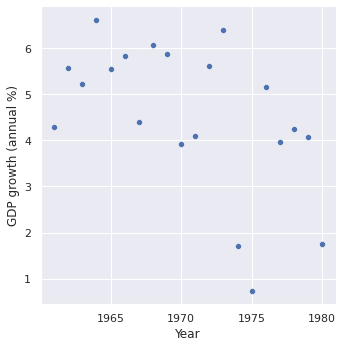

In [7]:
# create dataframe with CO2 emissions of 'World' in 1960-1980
q4_co2 = co2_df[co2_df['Country Code'] == 'WLD']
# create dataframe with GDP growth % of 'World' in 1960-1980
q4_gdp = GDP_df[GDP_df['Country Code'] == 'WLD']

#Merge the 2 dataset by 'Year', and drop any empty values
q4_combined = q4_co2.merge(q4_gdp, on=['Year'], how='left').dropna()
#drop unnecessary columns
q4_combined = q4_combined.drop(columns=['IndicatorName_x','IndicatorName_y','Country Code_x','Country Code_y'])

#create scatter plot for co2 emissions
sns.set() # Apply the default seaborn style
sns.relplot( # Use a seaborn relplot
    data = q4_combined, # Specify the data source
    kind = 'scatter', # Specify the kind of plot
    x = 'Year',
    y = 'CO2 emissions (metric tons per capita)'
)
plt.savefig('q4_co2graph.png')
#create scatter plot for GDP growth %
sns.set() # Apply the default seaborn style
sns.relplot( # Use a seaborn relplot
    data = q4_combined, # Specify the data source
    kind = 'scatter', # Specify the kind of plot
    x = 'Year',
    y = 'GDP growth (annual %)'
)
plt.savefig('q4_gdpgraph.png')

# compare correlation of CO2 emission and GDP growth percentage with standard correlation coefficient
print(q4_combined.corr(method ='pearson'))

**Answer:**

Based on the scatter plots, we can see a clear trend of the CO2 emissions (metric tons per capita) increasing year by year, this is expected, as industrialisation advances and living standard increases around the world the average CO2 emissions (metric tons per capita) also shows a linear increasing trend. This is further confirmed by the standard correlation coefficient between **Year** and **CO2 emissions (metric tons per capita)** calculated with the Pearson method.

On the other hand, the scatter plot of global average of GDP growth (annual %) shows fluctuation through 1960-1980, with 1975 and 1980 being the anomaly with significantly lower GDP growth (annual %). The standard correlation coefficient also demonstrates limited relationship between the time frame and the GDP growth factor. This is expected, as the GDP growth around the world is more affected by global events and does not progress as the time passes. For example, the low GDP growth percentage in 1980 would likely be due to the early 1980s recession, it was a severe economic recession that affected much of the world between approximately the start of 1980 and early 1983 (Ayhan Kose, Sugawara and Terrones, 2020).



**Question 5: Which country produced the most total CO2 emission in 1961, and is this related to their population?**

              Country Code                           IndicatorName  Year  \
CountryName                                                                
United States          USA  CO2 emissions (metric tons per capita)  1961   

               CO2 emissions (metric tons per capita)  
CountryName                                            
United States                               15.681256  
                                            Year  \
Year                                    1.000000   
CO2 emissions (metric tons per capita)  0.929657   
Population, total                       0.999054   

                                        CO2 emissions (metric tons per capita)  \
Year                                                                  0.929657   
CO2 emissions (metric tons per capita)                                1.000000   
Population, total                                                     0.934231   

                                        Population, total  
Year 

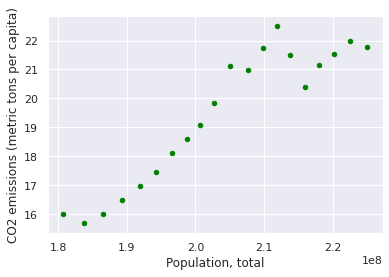

In [8]:
# create dataframe with all CO2 emission data from 1961
q5_co2 = co2_df[co2_df['Year'] == 1961]

#drop the regional data we are only interested in countries, also dropping data for outliers such as Luxembourg and Kuwait, since this is unlikely to be a accurate based on other data sources 
q5_co2 = q5_co2.drop([
'Arab World',
'Caribbean small states',
'Central Europe and the Baltics',
'East Asia & Pacific (all income levels)',
'East Asia & Pacific (developing only)',
'Euro area',
'Luxembourg',
'Kuwait',
'European Union',
'Fragile and conflict affected situations',
'Heavily indebted poor countries (HIPC)',
'High income',
'High income: OECD',
'Latin America & Caribbean (all income levels)',
'Latin America & Caribbean (developing only)',
'Least developed countries: UN classification',
'Low & middle income',
'Lower middle income',
'Middle East & North Africa (all income levels)',
'Middle East & North Africa (developing only)',
'Middle income',
'North America',
'OECD members',
'Pacific island small states',
'Small states',
'South Asia',
'Sub-Saharan Africa (all income levels)',
'Sub-Saharan Africa (developing only)',
'Upper middle income',
'World'
])

# obtain the highest CO2 emission in 1961
q5_years = q5_co2['CO2 emissions (metric tons per capita)'].max()

# filtering data by nominating the value we got from the previouse step 
q5_country = q5_co2[q5_co2['CO2 emissions (metric tons per capita)'] == q5_years]

print(q5_country)

#create plot to demonstrate the relationship between American population and CO2 emission per capita

# create dataframe with CO2 emissions of America in 1960-1980
q5_co2_1 = co2_df[co2_df['Country Code'] == 'USA']
# create dataframe with population of America in 1960-1980
q5_pop = population_df[population_df['Country Code'] == 'USA']

#Merge the 2 dataset by 'Year', and drop any empty values
q5_combined = q5_co2_1.merge(q5_pop, on=['Year'], how='left').dropna()
#drop unnecessary columns
q5_combined = q5_combined.drop(columns=['IndicatorName_x','IndicatorName_y','Country Code_x','Country Code_y'])

q5_combined.plot(
    kind = 'scatter',
    x = 'Population, total',
    y = 'CO2 emissions (metric tons per capita)',
    c = 'green'
)
plt.savefig('q5_graph.png')
#standard correlation coefficient
print(q5_combined.corr(method ='pearson'))

**Answer:**

America had the highest CO2 emissions (metric tons per capita) in 1961. By analysing the country's population and CO2 emission data from 1960-1980, the 2 shows a clear linear relationship. As America's population increases, the CO2 emissions (metric tons per capita) also increases.


**Question 6: Is there a relationship between the household final consumption expenditure, etc. (current US$), population life expectancy and annual GDP growth percentage in Mainland China?**

                                                        Year  \
Year                                                1.000000   
Life expectancy at birth, total (years)             0.931106   
Household final consumption expenditure (curren...  0.957099   
GDP growth (annual %)                               0.254756   

                                                    Life expectancy at birth, total (years)  \
Year                                                                               0.931106   
Life expectancy at birth, total (years)                                            1.000000   
Household final consumption expenditure (curren...                                 0.840073   
GDP growth (annual %)                                                              0.304984   

                                                    Household final consumption expenditure (current US$)  \
Year                                                                                         0

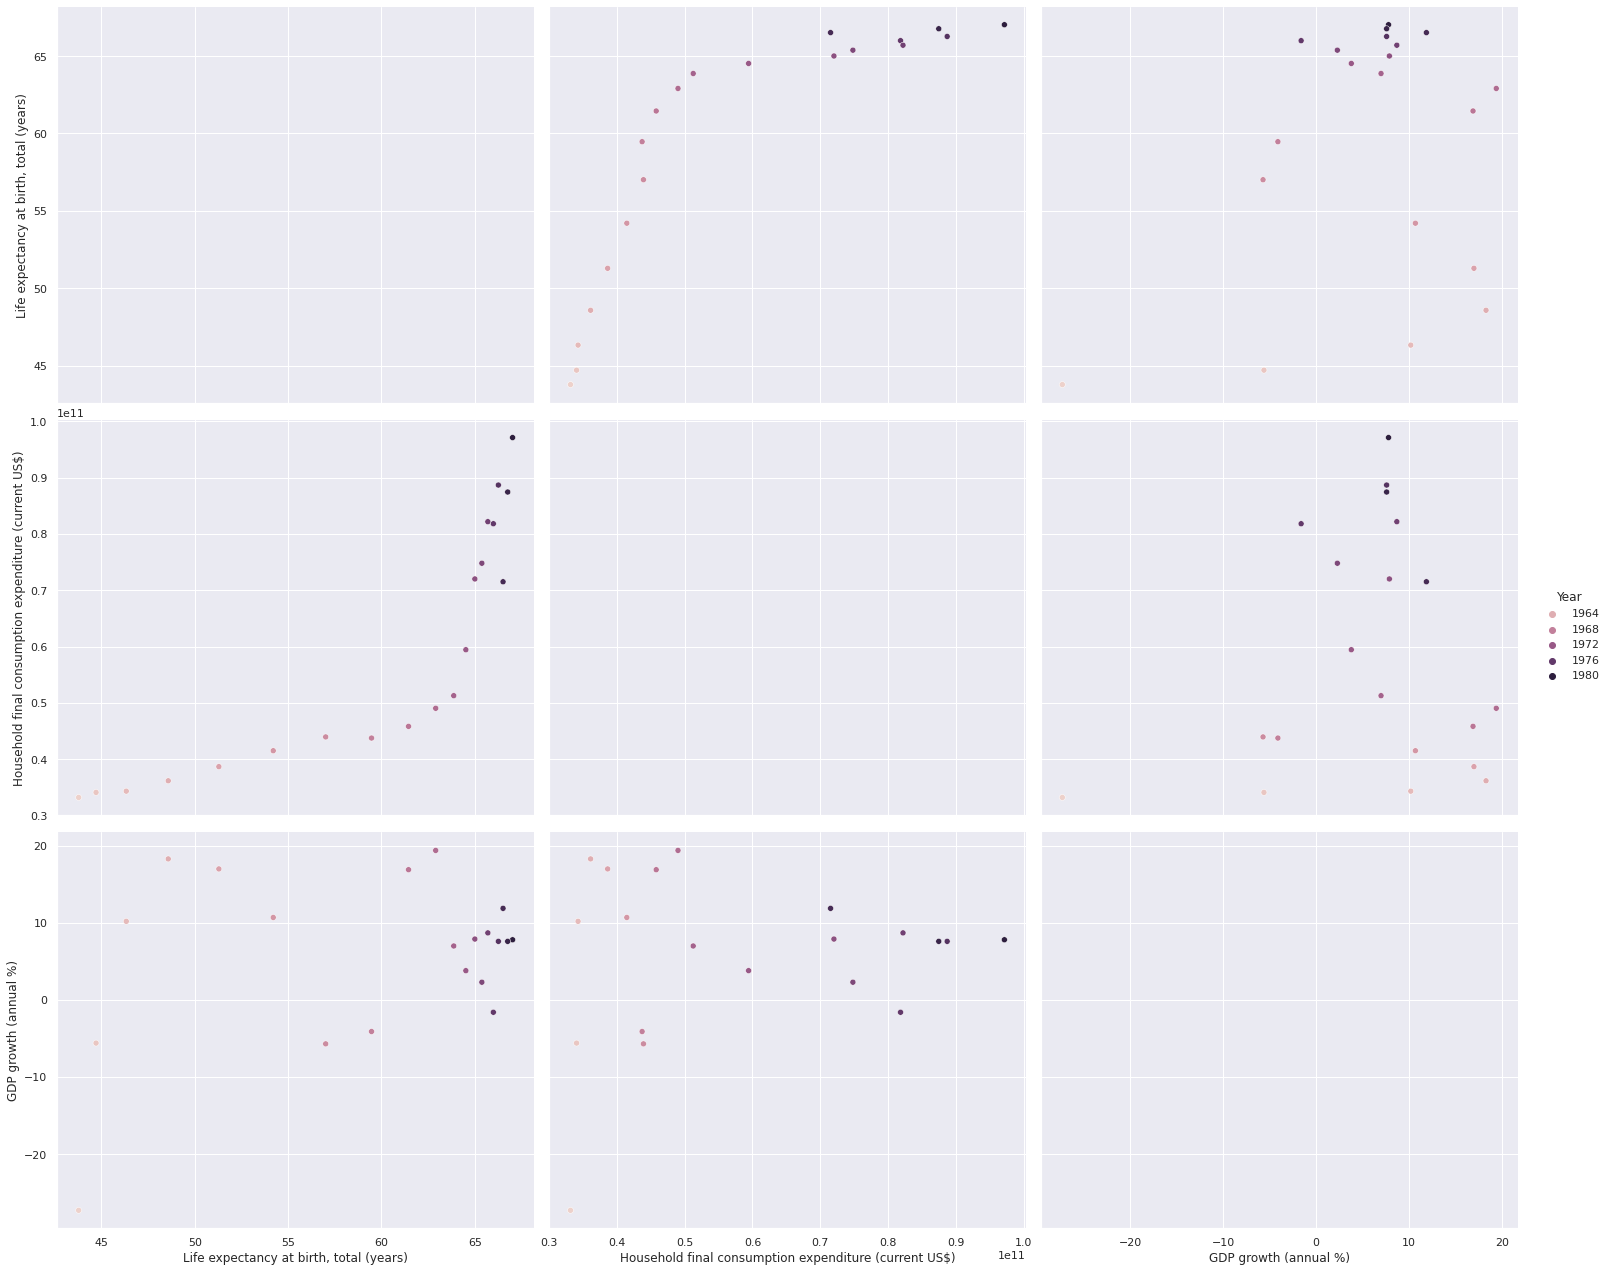

In [9]:
# create dataframe with life expectency of China in 1960-1980
q6_lifexpec= lifexpec_df[lifexpec_df['Country Code'] == 'CHN']
# create dataframe with household final consumption expenditure of China in 1960-1980
q6_household = household_df[household_df['Country Code'] == 'CHN']
# create dataframe with GDP growth percentage of China in 1960-1980
q6_gdp = GDP_df[GDP_df['Country Code'] == 'CHN']

#Merge the 3 dataset by 'Year', and drop any empty values
q6_combined = q6_lifexpec.merge(q6_household, on=['Year'], how='left').dropna()
q6_combined = q6_combined.merge(q6_gdp, on=['Year'], how='left').dropna()
#drop unnecessary columns
q6_combined = q6_combined.drop(columns=['IndicatorName','IndicatorName_x','IndicatorName_y','Country Code', 'Country Code_x','Country Code_y'])

#create scatter matrices, for identifying a correlation between 3 data series.
sns.set()
sns.pairplot(
    data = q6_combined,
    hue = 'Year',
    height=6, aspect=6/5
)
plt.savefig('q6_graph.png')
#standard correlation coefficient
print(q6_combined.corr(method ='pearson'))

**Answer:**



The relationship between the household final consumption expenditure, etc. (current US$), population life expectancy and annual GDP growth percentage in Mainland China is a complex one. 

It is fair to say, these 3 sets of data are all correlated to each other in one way or another. GDP per capita increases the life expectancy at birth through increasing economic growth and development in a country and thus leads to the prolongation of longevity. An increase in consumption expenditure causes GDP to rise by the same amount, other things being unchanged. Moreover, since current income (GDP) is an important determinant of consumption, the increase in income will be followed by a further rise in consumption expenditure (Li, Cheng and Gu, 2019).




### **5. Recommendation and Conclusion**

In conclusion, the results of this data analysis exercise demonstrate the development of countries around the world. This set of data is a vital measurement for a region or a world’s development level. This can help decision makers evaluate the under development and hardships in countries that needs global attention and how world events can have lasting impacts in regional development. 

This project examines the correlation among socioeconomic improvement and life expectancy at birth with household spending and CO2 emission per capita and infant mortality rate as history variables for the socioeconomic improvement(Miladinov, 2020). 

Hereby, information from over 100 countries from 1960 to 1980 had been used. An additional novelty in a geographic context is using the heat mapping method showing the economical advancement around the world in Question 3. Both coefficients of the historical variables display that the effect of a change in household spending per capita has a substantial impact on the life expectancy of the population at birth. It suggests that the life expectancy at birth is basically affected by the GDP growth percentage and socioeconomic improvement withinside the country; in other words, whilst the socioeconomic situation improves in underdeveloped countries the population growth will also further the country’s development, consequently life expectancy at birth has also increased. GDP growth percentage will increase the life expectancy at birth via economic growth and development in a country and thus leads to the prolongation of longevity. From Question 6, it can be concluded that the increase in the rate of GDP per capita as well as the reduction in the infant mortality rate has the same effect on the life expectancy in Mainland China. Based on the results from question 5, it is also concluded at least in the USA, economical growth, growth in population, life quality (household spending) and life expectancy will also lead to the increase in CO2 emissions metric tons per capita.

To address these issues, the World Bank Group have raised attention in every major area of development. These programs provide a wide array of financial products and technical assistance, and help countries share and apply innovative knowledge and solutions to the challenges they face.

For future analysis, other world development indicators can also be used to investigate the complex and intertwined relationship on different aspects of development. While in this project we have mainly investigated the correlation between economic growth and living standard around the world, the development of a country is determined by many other factors that is included in the world develop indicators data set. As seen in this project, the different contributing factors of a country’s development includes population growth, geo-political situations, and other world events. There are several areas of further data analysis could be beneficial. These include: 
 * Looking at the education level of different regions, along the same line we can also;
 * investigate the education disparity genders based on geo-political situations;
 * Investigate the relationship between import/export goods and energy consumption; 
 * Correlation between private housing ownership and carbon emission;
 * Finally, it would also be interesting to look into the relationship of waste production and household consumption.




### **6. References**

Chadha, S., 2018, *Country Wise Population Data*, online, accessed 16 April 2022, <https://www.kaggle.com/datasets/chadalee/country-wise-population-data>. 

Datacatalog.worldbank.org, 2020, *Data Catalog* online, accessed 14 April 2022, <https://datacatalog.worldbank.org/search/dataset/0037712>.

Gallo, A., 2016, 'A Refresher on Statistical Significance', accessed 16 April 2022, <https://hbr.org/2016/02/a-refresher-on-statistical-significance>.

Hamadi, R., 2022, 'ZZEN9021 -Principles of Programming (H222 Online)', accessed 8 March 2022 from UNSW Moodle course note.

Kaggle, 2020, *World Development Indicators*, Keggale.com, accessed 16 April 2022, <https://www.kaggle.com/datasets/kaggle/world-development-indicators?select=Indicators.csv>. 

Keesing's Worldwide, 2016, *Keesing's Record of World Events (formerly Keesing's Contemporary Archives)*, accessed 15 April 2022, <https://essaydocs.org/keesings-record-of-world-events-formerly-keesings-contemporary.html>.

Kose, M., Sugawara, N. and Terrones, M., 2020, 'Global Recessions', *World Bank.org*, accessed 15 April 2022, <https://documents1.worldbank.org/curated/en/185391583249079464/pdf/Global-Recessions.pdf> [Accessed 16 April 2022].

Li, Z., Cheng, H. and Gu, T., 2019, 'Research on dynamic relationship between natural gas consumption and economic growth in China', *Structural Change and Economic Dynamics*, No. 49, pp.334-339, accessed 16 April 2022. 

Miladinov, G., 2020, 'Socioeconomic development and life expectancy relationship: evidence from the EU accession candidate countries', *Genus*, No. 76(1)accessed 16 April 2022. 

Simpson, L., 2022, 'World Food Production', course project, University of New South Wales, accessed 13 April 2022 from UNSW ZZEN9021 Course Sample Project. 

World Bank, 2022, *WDI - Home*, online datatopics, accessed 15 April 2022, <https://datatopics.worldbank.org/world-development-indicators/>. 
